In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
df = pd.read_csv('train.csv')
print("Number of missing data :",df.isnull().sum().sum())
df.head()

Number of missing data : 0


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

id                  int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
columns = df.columns.tolist()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'prev_outcomes']
numeric_columns = [w for w in columns if w not in categorical_columns]
print(categorical_columns)
print(numeric_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'prev_outcomes']
['id', 'age', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


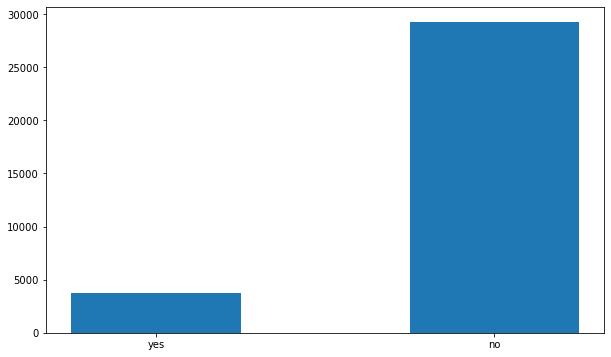

In [6]:
yes = df[df['y'] == 'yes'].count()[0]
no = df[df['y'] == 'no'].count()[0]
plt.bar(['yes', 'no'], [yes, no], width = 0.5)
plt.show()

In [7]:
job = df['job'].unique().tolist()
ynu = ['yes', 'no', 'unknown']
day = df['day_of_week'].unique().tolist()
contact = df['contact'].unique().tolist()
education = df['education'].unique().tolist()
age = df['age'].unique().tolist()

yes_age = []
yes_job = []
yes_loan = []
yes_housing = []
yes_day = []
yes_contact = []
yes_education = []
yes_age = []

for w in job :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][2] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_job.append(count)
    
for w in ynu :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][7] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_loan.append(count)

for w in ynu :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][6] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_housing.append(count)
    
for w in day :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][10] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_day.append(count)
    
for w in contact :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][8] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_contact.append(count)
    
for w in education :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][4] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_education.append(count)


for w in age :
    for i in range(len(df)) :
        if(df.loc[i][1] == w and df.loc[i][21] == 'yes') :
            yes_age.append(w)
            

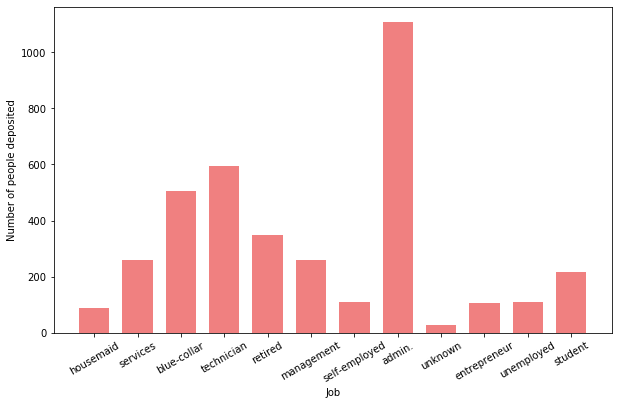

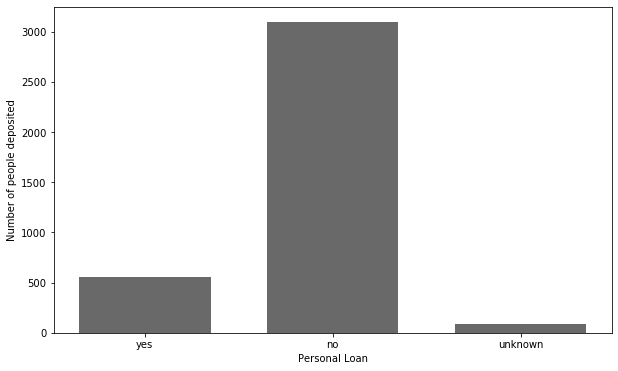

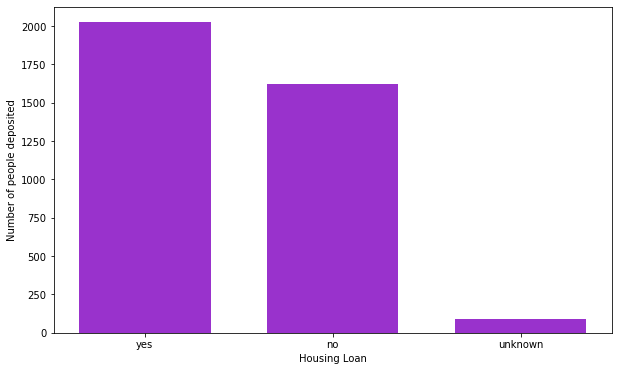

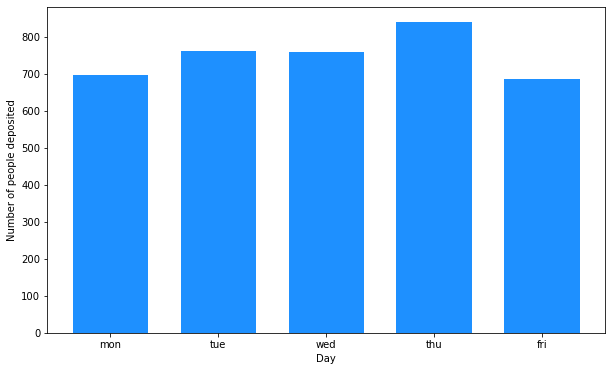

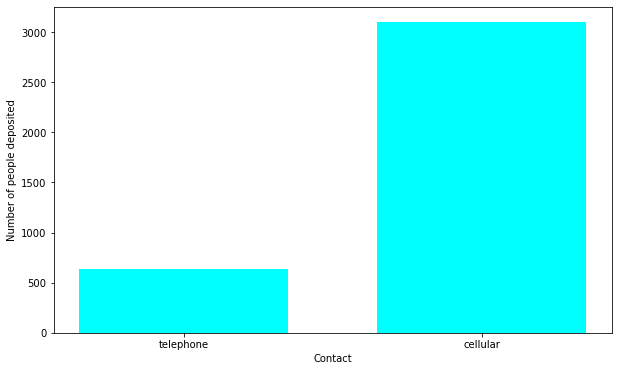

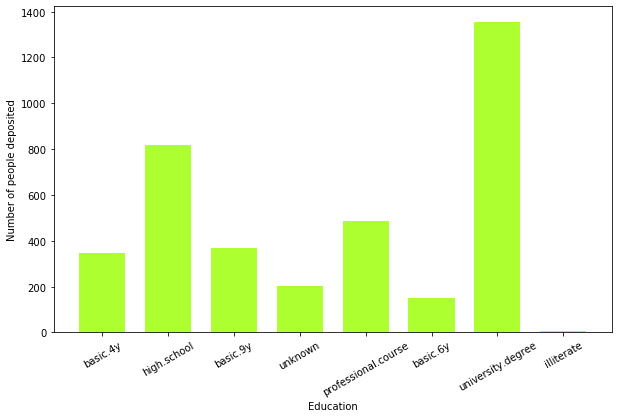

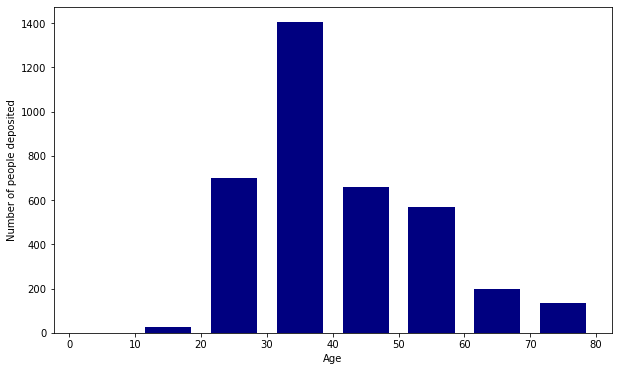

In [8]:
plt.bar(job, yes_job, color = 'lightcoral', width = 0.7)
plt.xticks(rotation = 30)
plt.xlabel('Job')
plt.ylabel('Number of people deposited')
plt.show()

plt.bar(ynu, yes_loan, width = 0.7, color = 'dimgray')
plt.xlabel('Personal Loan')
plt.ylabel('Number of people deposited')
plt.show()

plt.bar(ynu, yes_housing, width = 0.7, color = 'darkorchid')
plt.xlabel('Housing Loan')
plt.ylabel('Number of people deposited')
plt.show()

plt.bar(day, yes_day, color = 'dodgerblue', width = 0.7)
plt.xlabel('Day')
plt.ylabel('Number of people deposited')
plt.show()

plt.bar(contact, yes_contact, width = 0.7, color = 'aqua')
plt.xlabel('Contact')
plt.ylabel('Number of people deposited')
plt.show()

plt.bar(education, yes_education, color = 'greenyellow', width = 0.7)
plt.xticks(rotation= 30)
plt.xlabel('Education')
plt.ylabel('Number of people deposited')
plt.show()

bins = [0,10,20,30,40,50,60,70,80]
plt.hist(yes_age, bins, rwidth = 0.7, color = 'navy')
plt.xlabel('Age')
plt.ylabel('Number of people deposited')
plt.show()

In [9]:
month = df['month'].unique().tolist()
yes_month = []
yes_duration = []

for w in month :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][9] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_month.append(count)
    
for i in range(len(df)) :
    if(df.loc[i][21] == 'yes') :
        yes_duration.append(df.loc[i][11] / 60)

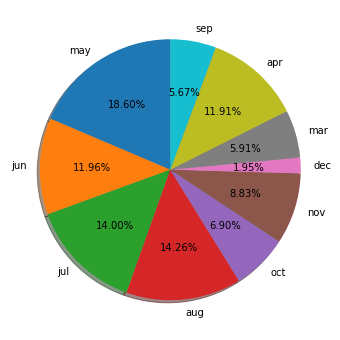

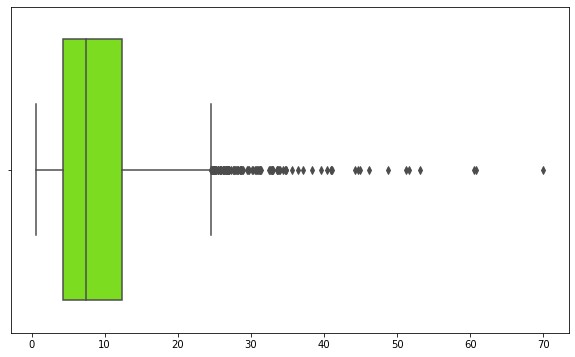

Max Duration : 69.98333333333333
Min Duration : 0.6166666666666667
Mean of duration : 9.184992418160734
Median of duration : 7.416666666666667


In [10]:
plt.pie(yes_month, labels=month, startangle = 90, shadow = True, autopct='%1.2f%%')
plt.show()

sns.boxplot(yes_duration, color = 'lawngreen', orient = 'h')
plt.show()
print("Max Duration :",np.max(yes_duration))
print("Min Duration :",np.min(yes_duration))
print("Mean of duration :",np.mean(yes_duration))
print("Median of duration :",np.median(yes_duration))

In [11]:
campaign = df['campaign'].unique().tolist()
poutcome = df['poutcome'].unique().tolist()

yes_campaign = []
yes_poutcome = []

In [12]:
for w in campaign :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][12] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_campaign.append(count)
    
for w in poutcome :
    count = 0
    for i in range(len(df)) :
        if(df.loc[i][15] == w and df.loc[i][21] == 'yes') :
            count += 1
    yes_poutcome.append(count)

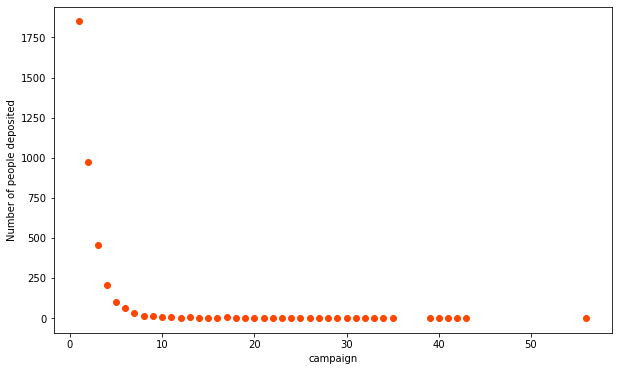

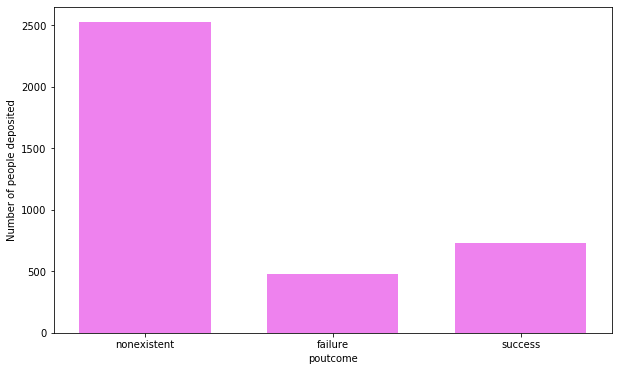

In [13]:
plt.scatter(campaign, yes_campaign, color = 'orangered')
plt.xlabel('campaign')
plt.ylabel('Number of people deposited')
plt.show()

plt.bar(poutcome, yes_poutcome, color = 'violet', width = 0.7)
plt.xlabel('poutcome')
plt.ylabel('Number of people deposited')
plt.show()



In [14]:
poutcome_campaign = []
for i in range(len(df)) :
    if(df.loc[i][15] == 'success' and df.loc[i][21] == 'yes') :
        poutcome_campaign.append(df.loc[i][12])

print("Out of 3737 people 729 people are those who have done the previous term deposits and now they agreed for the\n deposit with only the least amount of campaign.")

Out of 3737 people 729 people are those who have done the previous term deposits and now they agreed for the
 deposit with only the least amount of campaign.


In [15]:
pd.DataFrame(poutcome_campaign).describe()

,0
count,729.000000
mean,1.713306
std,1.033160
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


# Insights

<p>1. There are a total of 32978 people in the dataset. Out of them only 3737 opted for Term Deposit.</p>
<p>2. The people here ivolved have diverse occupations. Out of them those who are at the administrative post have made most of the deposit. Technicians, Blue-collar job and retired people too have significant contributions. Also the least counts has been shown by obviously homemaid, unemployed and self-employed people. One of the target customers could be the entrepreneur.</p>
<p>3. Most of the people who made the deposit did not have any prior or current personal loan from the same bank.</p>
<p>4. But, most of the people who made the deposit, already had the housing loan from the bank. Despite the housing     
loan they made a fixed deposit which directly indicates that <b>they can be good investors to the company</b>.
<p>5. Since, most of the people are employed and spend their most of the time in the office therefore it would be preferrable for the company to contact them on their cellular phones. Contacting them on telephone wou't be a nice choice as most of the time they won't be at their home.<p>
<p>6. It doesn't depends significantly on the day when the people were contacted during the week.
<p>7. People who are well educated, know the importance and benfits of the fixed deposit can easly be convinced as they have the resources. But less educated people may lack money due to which they can deny the deposit.</p>
<p>8. People in the age group (30,40) are the one who have made the largest number of deposit. These people may have a well settled job and interested in investments.</p>
<p>9. Most of the cutomers are very active in the months of May, June, July and August.</p>
<p>10. It can be seen that customers can be convinced to make a deposit if they talk to the agents longer about details of the term.</p>

# Solutions

<p>1. People already having bank accounts and credit can easily be convinced.</p>
<p>2. People having good income and low expenses can also be easily convinced.</p>
<p>3. People are difficult to convince if they are contacted too frequently and many times.</p> 
<p>4. It is useless to make a lot of effort during December as there it has the least number of customer.</p>
<p>5. End of the year is the best time to replan the strtegy.</p>

# Training Data Preprocessing

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm, linear_model, tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv('train.csv')
temp = df.copy()
enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
a = np.array(df['month'])
a = np.reshape(a, (32978,1))
enc.fit(a)
enc.categories_
b = enc.transform(a).toarray()
apr = pd.DataFrame(b[:,0])
aug = pd.DataFrame(b[:,1])
dec = pd.DataFrame(b[:,2])
jul = pd.DataFrame(b[:,3])
jun = pd.DataFrame(b[:,4])
mar = pd.DataFrame(b[:,5])
may = pd.DataFrame(b[:,6])
nov = pd.DataFrame(b[:,7])
ocb = pd.DataFrame(b[:,8])
sep = pd.DataFrame(b[:,9])
temp = temp.assign(apr=apr,aug=aug,dec=dec,jul=jul,jun=jun,mar=mar,may=may,nov=nov,ocb=ocb,sep=sep)

In [19]:
j = np.array(df['job'])
j = np.reshape(j, (32978,1))
enc.fit(j)
enc.categories_
job = enc.transform(j).toarray()
admin = pd.DataFrame(job[:,0])
blue_collar = pd.DataFrame(job[:,1])
entrepreneur = pd.DataFrame(job[:,2])
housemaid = pd.DataFrame(job[:,3])
management = pd.DataFrame(job[:,4])
retired = pd.DataFrame(job[:,5])
self_employed = pd.DataFrame(job[:,6])
services = pd.DataFrame(job[:,7])
student = pd.DataFrame(job[:,8])
technician = pd.DataFrame(job[:,9])
unemployed = pd.DataFrame(job[:,10])
unknown = pd.DataFrame(job[:,11])
temp = temp.assign(admin=admin,blue_collar=blue_collar,entrepreneur=entrepreneur,housemaid=housemaid,management=management,retired=retired,self_employed=self_employed,services=services,student=student,technician=technician,unemployed=unemployed,unknown=unknown)

In [20]:
h = np.array(df['housing'])
h = np.reshape(h, (32978,1))
enc.fit(h)
enc.categories_
housing = enc.transform(h).toarray()
housing_no = pd.DataFrame(housing[:,0])
housing_unknown = pd.DataFrame(housing[:,1])
housing_yes = pd.DataFrame(housing[:,2])
temp = temp.assign(housing_no=housing_no,housing_unknown=housing_unknown,housing_yes=housing_yes)

In [21]:
e = np.array(df['education'])
e = np.reshape(e, (32978,1))
enc.fit(e)
enc.categories_
education = enc.transform(e).toarray()
basic4y = pd.DataFrame(education[:,0])
basic6y = pd.DataFrame(education[:,0])
basic9y = pd.DataFrame(education[:,0])
highschool = pd.DataFrame(education[:,0])
illiterate = pd.DataFrame(education[:,0])
professionalcourse = pd.DataFrame(education[:,0])
universitydegree = pd.DataFrame(education[:,0])
unknown = pd.DataFrame(education[:,0])
temp = pd.DataFrame(temp).assign(basic4y=basic4y,basic6y=basic6y,basic9y=basic9y,highschool=highschool,illiterate=illiterate,professionalcourse=professionalcourse,universitydegree=universitydegree,unknown=unknown)

In [22]:
l = np.array(df['loan'])
l = np.reshape(l, (32978,1))
enc.fit(l)
enc.categories_
loan = enc.transform(l).toarray()
loan_no = pd.DataFrame(loan[:,0])
loan_unknown = pd.DataFrame(loan[:,1])
loan_yes = pd.DataFrame(loan[:,2])
temp = temp.assign(loan_no=loan_no,loan_unknown=loan_unknown,loan_yes=loan_yes)

In [23]:
p = np.array(df['poutcome'])
p = np.reshape(p, (32978,1))
enc.fit(p)
enc.categories_
poutcome = enc.transform(p).toarray()
poutcome_no = pd.DataFrame(poutcome[:,0])
poutcome_unknown = pd.DataFrame(poutcome[:,1])
poutcome_yes = pd.DataFrame(poutcome[:,2])
temp = temp.assign(poutcome_no=poutcome_no,poutcome_unknown=poutcome_unknown,poutcome_yes=poutcome_yes)

In [24]:
m = np.array(df['marital'])
m = np.reshape(m, (32978,1))
enc.fit(m)
enc.categories_
marital = enc.transform(m).toarray()
marital_failure = pd.DataFrame(poutcome[:,0])
marital_nonexistent = pd.DataFrame(poutcome[:,1])
marital_success = pd.DataFrame(poutcome[:,2])
temp = temp.assign(marital_failure=marital_failure,marital_nonexistent=marital_nonexistent,marital_success=marital_success)

In [25]:
c = np.array(df['contact'])
c = np.reshape(c, (32978,1))
enc.fit(c)
enc.categories_
contact = enc.transform(c).toarray()
contact_cellular = pd.DataFrame(poutcome[:,0])
contact_telephone = pd.DataFrame(poutcome[:,1])
temp = temp.assign(contact_cellular=contact_cellular,contact_telephone=contact_telephone)

In [26]:
y = temp['y']
temp.drop(['month','poutcome','job','id','marital','education','contact','day_of_week','duration','default','housing','loan','y'],axis=1,inplace=True)

In [27]:
temp.to_csv('train_new.csv', index=False)
temp.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,apr,...,loan_unknown,loan_yes,poutcome_no,poutcome_unknown,poutcome_yes,marital_failure,marital_nonexistent,marital_success,contact_cellular,contact_telephone
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
t = pd.read_csv('test.csv')
temp = pd.read_csv('train_new.csv')
y = df['y']
scaler = MinMaxScaler()
scaler.fit(temp)
temp = scaler.transform(temp)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size = 0.3)

# Test Data Preprocessing

In [30]:
df = pd.read_csv('test.csv')
temp = df.copy()
enc = OneHotEncoder(handle_unknown='ignore')

In [31]:
df = pd.read_csv('test.csv')
temp = df.copy()
enc = OneHotEncoder(handle_unknown='ignore')

In [32]:
a = np.array(df['month'])
a = np.reshape(a, (8210,1))
enc.fit(a)
b = enc.transform(a).toarray()
apr = pd.DataFrame(b[:,0])
aug = pd.DataFrame(b[:,1])
dec = pd.DataFrame(b[:,2])
jul = pd.DataFrame(b[:,3])
jun = pd.DataFrame(b[:,4])
mar = pd.DataFrame(b[:,5])
may = pd.DataFrame(b[:,6])
nov = pd.DataFrame(b[:,7])
ocb = pd.DataFrame(b[:,8])
sep = pd.DataFrame(b[:,9])
temp = temp.assign(apr=apr,aug=aug,dec=dec,jul=jul,jun=jun,mar=mar,may=may,nov=nov,ocb=ocb,sep=sep)

In [33]:
j = np.array(df['job'])
j = np.reshape(j, (8210,1))
enc.fit(j)
enc.categories_
job = enc.transform(j).toarray()
admin = pd.DataFrame(job[:,0])
blue_collar = pd.DataFrame(job[:,1])
entrepreneur = pd.DataFrame(job[:,2])
housemaid = pd.DataFrame(job[:,3])
management = pd.DataFrame(job[:,4])
retired = pd.DataFrame(job[:,5])
self_employed = pd.DataFrame(job[:,6])
services = pd.DataFrame(job[:,7])
student = pd.DataFrame(job[:,8])
technician = pd.DataFrame(job[:,9])
unemployed = pd.DataFrame(job[:,10])
unknown = pd.DataFrame(job[:,11])
temp = temp.assign(admin=admin,blue_collar=blue_collar,entrepreneur=entrepreneur,housemaid=housemaid,management=management,retired=retired,self_employed=self_employed,services=services,student=student,technician=technician,unemployed=unemployed,unknown=unknown)

In [34]:
h = np.array(df['housing'])
h = np.reshape(h, (8210,1))
enc.fit(h)
enc.categories_
housing = enc.transform(h).toarray()
housing_no = pd.DataFrame(housing[:,0])
housing_unknown = pd.DataFrame(housing[:,1])
housing_yes = pd.DataFrame(housing[:,2])
temp = temp.assign(housing_no=housing_no,housing_unknown=housing_unknown,housing_yes=housing_yes)

In [35]:
e = np.array(df['education'])
e = np.reshape(e, (8210,1))
enc.fit(e)
enc.categories_
education = enc.transform(e).toarray()
basic4y = pd.DataFrame(education[:,0])
basic6y = pd.DataFrame(education[:,0])
basic9y = pd.DataFrame(education[:,0])
highschool = pd.DataFrame(education[:,0])
illiterate = pd.DataFrame(education[:,0])
professionalcourse = pd.DataFrame(education[:,0])
universitydegree = pd.DataFrame(education[:,0])
unknown = pd.DataFrame(education[:,0])
temp = pd.DataFrame(temp).assign(basic4y=basic4y,basic6y=basic6y,basic9y=basic9y,highschool=highschool,illiterate=illiterate,professionalcourse=professionalcourse,universitydegree=universitydegree,unknown=unknown)

In [36]:
l = np.array(df['loan'])
l = np.reshape(l, (8210,1))
enc.fit(l)
enc.categories_
loan = enc.transform(l).toarray()
loan_no = pd.DataFrame(loan[:,0])
loan_unknown = pd.DataFrame(loan[:,1])
loan_yes = pd.DataFrame(loan[:,2])
temp = temp.assign(loan_no=loan_no,loan_unknown=loan_unknown,loan_yes=loan_yes)

In [37]:
p = np.array(df['poutcome'])
p = np.reshape(p, (8210,1))
enc.fit(p)
enc.categories_
poutcome = enc.transform(p).toarray()
poutcome_no = pd.DataFrame(poutcome[:,0])
poutcome_unknown = pd.DataFrame(poutcome[:,1])
poutcome_yes = pd.DataFrame(poutcome[:,2])
temp = temp.assign(poutcome_no=poutcome_no,poutcome_unknown=poutcome_unknown,poutcome_yes=poutcome_yes)

In [38]:
m = np.array(df['marital'])
m = np.reshape(m, (8210,1))
enc.fit(m)
enc.categories_
marital = enc.transform(m).toarray()
marital_failure = pd.DataFrame(poutcome[:,0])
marital_nonexistent = pd.DataFrame(poutcome[:,1])
marital_success = pd.DataFrame(poutcome[:,2])
temp = temp.assign(marital_failure=marital_failure,marital_nonexistent=marital_nonexistent,marital_success=marital_success)

In [39]:
c = np.array(df['contact'])
c = np.reshape(c, (8210,1))
enc.fit(c)
enc.categories_
contact = enc.transform(c).toarray()
contact_cellular = pd.DataFrame(poutcome[:,0])
contact_telephone = pd.DataFrame(poutcome[:,1])
temp = temp.assign(contact_cellular=contact_cellular,contact_telephone=contact_telephone)

In [40]:
temp = temp.drop(['id','month','marital','education','contact','day_of_week','duration','poutcome','job','default','housing','loan'],axis = 1)

In [41]:
temp.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,apr,...,loan_unknown,loan_yes,poutcome_no,poutcome_unknown,poutcome_yes,marital_failure,marital_nonexistent,marital_success,contact_cellular,contact_telephone
0,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,25,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
scaler = MinMaxScaler()
scaler.fit(temp)
temp = scaler.transform(temp)
pd.DataFrame(temp).to_csv('test_new.csv',index=False)

# Models

# KNN

In [43]:
clf5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
clf5.fit(X_train, y_train)
print('Accuracy of KNN classifier is', clf5.score(X_test, y_test))

Accuracy of KNN classifier is 0.8879118657772387


# SVM

In [44]:
clf1 = svm.SVC(gamma = 0.001, C = 2, kernel = 'rbf', shrinking=True, max_iter=50000, degree = 3)
clf1.fit(X_train, y_train)
print('Accuracy of SVM is', clf1.score(X_test, y_test))

Accuracy of SVM is 0.8941782898726501


In [45]:
from keras import models, layers, Sequential, Model
from keras.preprocessing import sequence
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [46]:
train = pd.read_csv('train_new.csv')
train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,apr,...,loan_unknown,loan_yes,poutcome_no,poutcome_unknown,poutcome_yes,marital_failure,marital_nonexistent,marital_success,contact_cellular,contact_telephone
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
u = pd.read_csv('test.csv')
t = pd.read_csv('train.csv')
y = t['y'].tolist()
for i in range(len(y)) :
    if(y[i] == 'no') :
        y[i] = 0
    elif(y[i] == 'yes') :
        y[i] = 1

In [48]:
scaler = MinMaxScaler()
scaler.fit(train)
temp = scaler.transform(train)

In [49]:
model = models.Sequential()
model.add(layers.Dense(256, activation='tanh', input_shape=(52,)))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               13568     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [50]:
model.compile(optimizer='Adam',
                loss='mean_squared_error',
                metrics=['accuracy'])

In [51]:
model.fit(temp, y, epochs = 30, batch_size = 64)

Epoch 1/30
32978/32978 [==============================] - 7s 207us/step - loss: 0.0915 - accuracy: 0.8959
Epoch 2/30
32978/32978 [==============================] - 6s 170us/step - loss: 0.0906 - accuracy: 0.8973
Epoch 3/30
32978/32978 [==============================] - 8s 249us/step - loss: 0.0904 - accuracy: 0.8970
Epoch 4/30
32978/32978 [==============================] - 6s 193us/step - loss: 0.0904 - accuracy: 0.8970
Epoch 5/30
32978/32978 [==============================] - 6s 194us/step - loss: 0.0910 - accuracy: 0.8956
Epoch 6/30
32978/32978 [==============================] - 6s 197us/step - loss: 0.0934 - accuracy: 0.8910
Epoch 7/30
32978/32978 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.88 - 7s 200us/step - loss: 0.0952 - accuracy: 0.8894
Epoch 8/30
32978/32978 [==============================] - 7s 207us/step - loss: 0.0931 - accuracy: 0.8861
Epoch 9/30
32978/32978 [==============================] - 8s 251us/step - loss: 0.0896 - accuracy: 0.8942
Epoc

In [52]:
q = np.array(temp)

In [53]:
data_gen = sequence.TimeseriesGenerator(q, y,
                                        length=1,
                                        batch_size=1)
l = []
batch = []
for w in data_gen :
        l.append(w[1])
        p = np.reshape(w[0], (1,52))
        batch.append(p)

In [54]:
# print(np.shape(batch))
print(np.shape(l))
batch = np.array(batch)
l = np.array(l)

(32977, 1)


# Model Used in Competetion

In [55]:
model1 = Sequential()

model1.add(layers.LSTM(units = 128, return_sequences=True, batch_input_shape  = (None, 1, 52)))
model1.add(layers.Dropout(0.2))

model1.add(layers.LSTM(units = 128, return_sequences=True))
model1.add(layers.Dropout(0.2))

model1.add(layers.LSTM(units = 128))
model1.add(layers.Dropout(0.2))

model1.add(layers.Dense(1))
model1.add(layers.Activation('relu'))

model1.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model1.fit(batch, l, epochs = 10, verbose = 0)

In [ ]:
test = pd.read_csv('test_new.csv')
test = np.array(test)
result = model.predict(test)
final = []

In [ ]:
result = model1.predict(batch_test, verbose = 1)

In [ ]:
for i in range(len(result)) :
    if(result[i] >= 0.57) :
        final.append('yes')
    else :
        final.append('no')
        

i=0
for w in final :
    if(w == 'yes') :
        i+=1
i

In [ ]:
data = pd.DataFrame(u['id'])
final = pd.DataFrame(final)
data['y'] = final
data.to_csv('data.csv',index=False)